# Enhancing NHL Salary Evaluation through Dimensionality Reduction  
Raphaël Fontaine  
McGill University  
Montreal, Canada  
raphael.fontaine@mail.mcgill.ca  

# Feature Selection

In [1]:
import common
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = common.load_dataset()

# Split features and label
X_data, y_data = common.split_dataset(df)

X_columns = X_data.columns

# Split train and test data
X_train, y_train, X_test, y_test = common.split_train_test(X_data, y_data)

## Feature Selection

### Remove features with low variance

In [3]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate the variance
variance = np.var(X_train_scaled, axis=0)
variance_df = pd.DataFrame(variance, index=X_columns, columns=['variance'])

# Display the top 10 features with the highest variance
print("Features with the highest variance")
display(variance_df.sort_values(by='variance', ascending=False).head(20))

# Display the top 10 features with the lowest variance
print("Features with the lowest variance")
display(variance_df.sort_values(by='variance', ascending=True).head(20))

Features with the highest variance


,variance
nationality_CAN,0.248886
shootsCatches_R,0.232368
position_D,0.228136
nationality_USA,0.186624
position_L,0.159966
position_R,0.133075
season,0.104679
nationality_SWE,0.093311
I_F_shifts_5on4,0.068052
shifts_5on4,0.068052


Features with the lowest variance


,variance
nationality_NLD,0.000000
nationality_SVN,0.000558
nationality_BLR,0.001394
offIce_corsiPercentage_4on5,0.002534
nationality_LVA,0.002785
nationality_NOR,0.002785
offIce_fenwickPercentage_4on5,0.003308
I_F_reboundGoals_4on5,0.003333
offIce_corsiPercentage_5on4,0.004083
nationality_FRA,0.004171


In [4]:
variance_thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
results = []

for threshold in variance_thresholds:
    selected_features = np.where(variance > threshold)[0]
    X_train_reduced = X_train[:, selected_features]
    X_test_reduced = X_test[:, selected_features]

    # Standardize the data
    X_train_reduced, X_test_reduced = common.standard_scaler(X_train_reduced, X_test_reduced)

    # Train and evaluate the model
    results_df, predictions = common.train_and_evaluate(X_train_reduced, y_train, X_test_reduced, y_test)

    # Save the results in another df with the specific threshold
    results_df["Features"] = X_train_reduced.shape[1]
    results_df["Threshold"] = threshold

    results.append(results_df)

results_df = pd.concat(results)
results_df.groupby(by="Threshold")[results_df.columns].apply(lambda x: x).drop(columns=["Threshold"])

R2        MAE Top-100 MAE Top-50 MAE  \
Threshold Model                                                           
0.01      Linear Regression    0.5024  1,444,133   1,977,317  2,304,512   
          Random Forest        0.5707  1,340,970   1,750,731  2,218,032   
          Support Vector       0.5823  1,296,489   1,942,936  2,497,923   
          K-Nearest Neighbors  0.5629  1,342,834   1,912,944  2,464,192   
0.02      Linear Regression    0.5140  1,420,031   1,917,548  2,261,717   
          Random Forest        0.5715  1,341,772   1,753,626  2,211,082   
          Support Vector       0.5874  1,293,308   1,927,914  2,484,424   
          K-Nearest Neighbors  0.5540  1,366,021   1,864,098  2,334,045   
0.03      Linear Regression    0.5290  1,395,072   2,011,941  2,344,456   
          Random Forest        0.5535  1,359,619   1,704,305  2,113,901   
          Support Vector       0.5557  1,346,444   1,874,234  2,408,629   
          K-Nearest Neighbors  0.5421  1,396,171   1,832,835  2,200,864   
0.04      Linear Regression    0.5341  1,424,041   1,850,242  2,267,687   
          Random Forest        0.5408  1,370,534   1,693,126  2,110,504   
          Support Vector       0.5353  1,400,692   1,875,733  2,365,925   
          K-Nearest Neighbors  0.5252  1,427,714   1,904,417  2,391,179   
0.05      Linear Regression    0.4805  1,516,414   1,889,712  2,245,816   
          Random Forest        0.5203  1,411,781   1,907,684  2,393,466   
          Support Vector       0.4066  1,586,163   2,692,241  3,619,580   
          K-Nearest Neighbors  0.4571  1,496,368   2,099,004  2,827,101   
0.06      Linear Regression    0.4033  1,630,867   2,367,750  3,106,159   
          Random Forest        0.4421  1,502,002   2,149,980  2,714,460   
          Support Vector       0.3558  1,641,583   2,923,764  3,956,213   
          K-Nearest Neighbors  0.4243  1,504,398   2,222,808  2,960,498   

                                SMAPE  Train time (sec)  Features  
Threshold Model                                                    
0.01      Linear Regression    0.3676              0.41       727  
          Random Forest        0.3441              6.89       727  
          Support Vector       0.3266              5.74       727  
          K-Nearest Neighbors  0.3415              0.02       727  
0.02      Linear Regression    0.3569              0.84       534  
          Random Forest        0.3433              6.19       534  
          Support Vector       0.3282              3.51       534  
          K-Nearest Neighbors  0.3469              0.02       534  
0.03      Linear Regression    0.3578              0.25       211  
          Random Forest        0.3465              3.33       211  
          Support Vector       0.3384              0.94       211  
          K-Nearest Neighbors  0.3544              0.00       211  
0.04      Linear Regression    0.3688              0.42        67  
          Random Forest        0.3478              2.16        67  
          Support Vector       0.3565              0.54        67  
          K-Nearest Neighbors  0.3604              0.00        67  
0.05      Linear Regression    0.3876              0.05        18  
          Random Forest        0.3564              0.97        18  
          Support Vector       0.3934              0.51        18  
          K-Nearest Neighbors  0.3749              0.00        18  
0.06      Linear Regression    0.4082              0.06        12  
          Random Forest        0.3698              0.62        12  
          Support Vector       0.4036              0.38        12  
          K-Nearest Neighbors  0.3693              0.00        12

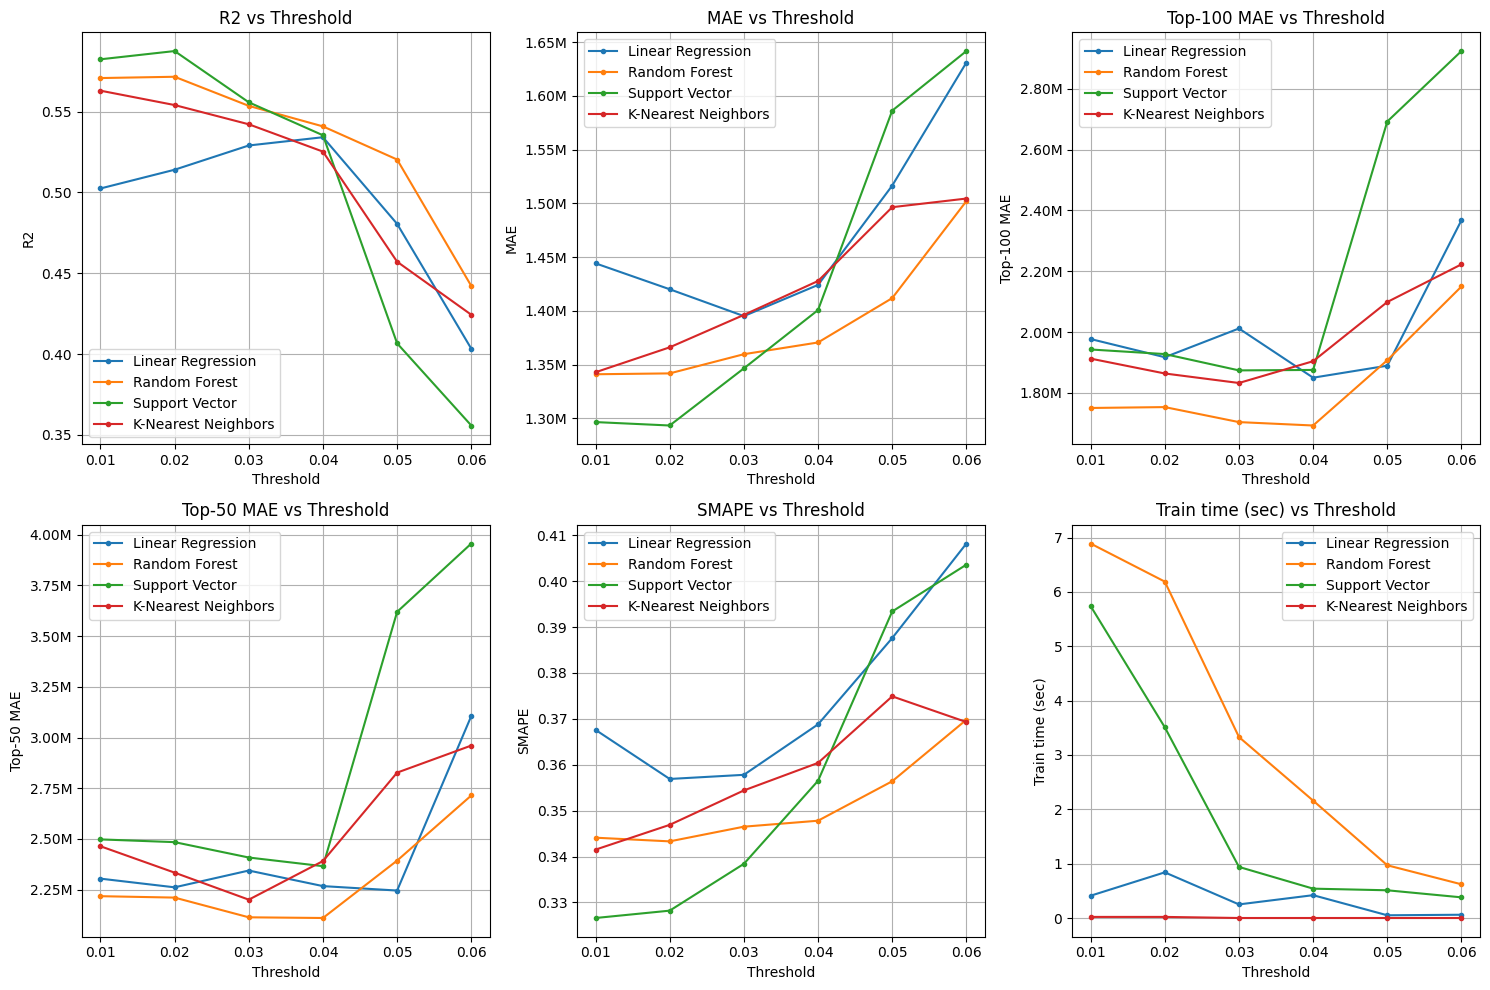

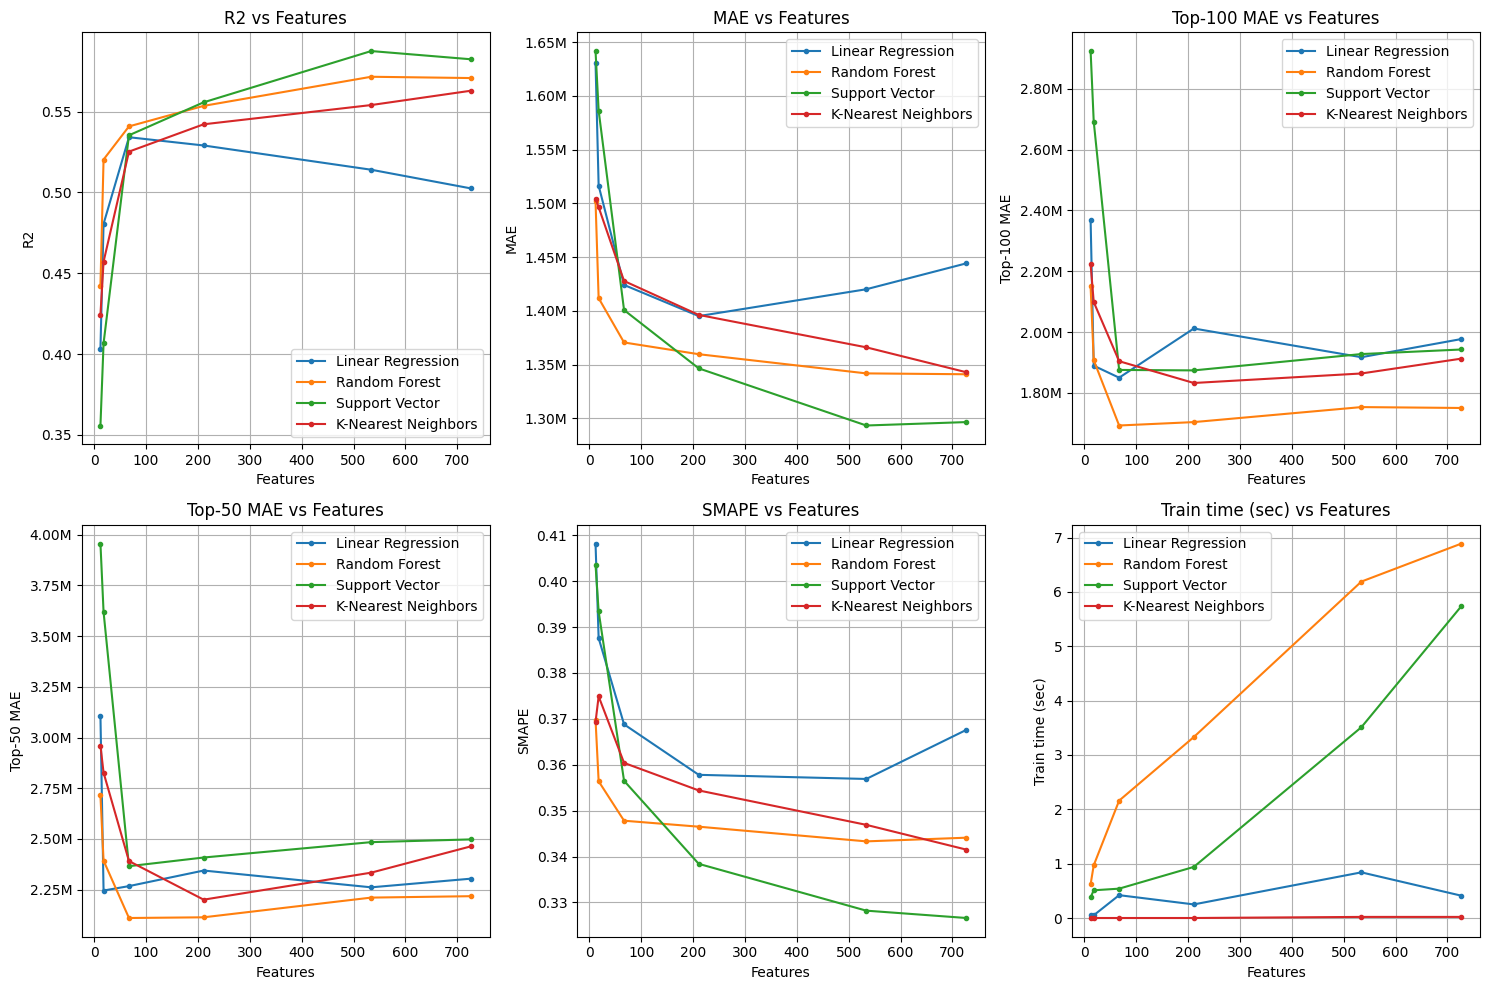

In [5]:
common.plot_metrics(results_df, "Threshold")
common.plot_metrics(results_df, "Features")

### Univariate feature selection

In [6]:
def pearson_correlation(X, y):
    # Center the data
    X_centered = X - X.mean()
    y_centered = y - y.mean()

    # Calculate the covariance
    covariance = X_centered.T @ y_centered / (X.shape[0] - 1)

    # Calculate the standard deviations
    std_X = X.std()
    std_y = y.std()

    # Calculate Pearson's r
    r = covariance / (std_X * std_y)

    return r

In [7]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate the Pearson correlation
pearson_corr = pearson_correlation(X_train_scaled, y_train)
correlation_df = pd.DataFrame(pearson_corr, index=X_columns, columns=['correlation'])

# Display the top 10 features with the highest correlation
display(correlation_df.sort_values(by='correlation', ascending=False).head(20))

# Display the top 10 features with the lowest correlation
display(correlation_df.sort_values(by='correlation', ascending=True).head(20))

,correlation
I_F_oZoneShiftStarts_5on4,0.657052
icetime_5on4,0.624534
OnIce_F_shotAttempts_5on4,0.594658
OnIce_F_scoreAdjustedShotsAttempts_5on4,0.594658
OnIce_F_unblockedShotAttempts_5on4,0.582603
OnIce_F_scoreAdjustedUnblockedShotAttempts_5on4,0.582603
I_F_shifts_5on4,0.581040
shifts_5on4,0.581040
OnIce_F_blockedShotAttempts_5on4,0.577918
OnIce_F_xOnGoal_5on4,0.576197


,correlation
iceTimeRank,-0.347112
iceTimeRank_5on5,-0.268340
offIce_corsiPercentage,-0.173838
offIce_fenwickPercentage,-0.170056
offIce_xGoalsPercentage,-0.169862
offIce_corsiPercentage_other,-0.140132
offIce_fenwickPercentage_other,-0.130943
OffIce_F_xGoals,-0.113007
I_F_hits_5on5,-0.112420
I_F_hits,-0.104416


In [8]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

results = []
for threshold in thresholds:
    selected_features = np.where(np.absolute(pearson_corr) > threshold)[0]
    X_train_reduced = X_train_scaled[:, selected_features]
    X_test_reduced = X_test_scaled[:, selected_features]

    # Standardize the data (scaler)
    X_train_reduced, X_test_reduced = common.standard_scaler(X_train_reduced, X_test_reduced)

    # Train and evaluate the model
    results_df, predictions = common.train_and_evaluate(X_train_reduced, y_train, X_test_reduced, y_test)

    # Save the results in another df with the specific threshold
    results_df["Features"] = X_train_reduced.shape[1]
    results_df["Threshold"] = threshold

    results.append(results_df)

results_df = pd.concat(results)
results_df.groupby(by="Threshold")[results_df.columns].apply(lambda x: x).drop(columns=["Threshold"])

R2        MAE Top-100 MAE Top-50 MAE  \
Threshold Model                                                           
0.1       Linear Regression    0.4955  1,469,050   1,903,977  2,213,647   
          Random Forest        0.5559  1,366,071   1,733,658  2,165,628   
          Support Vector       0.5560  1,339,682   1,894,952  2,393,776   
          K-Nearest Neighbors  0.5442  1,386,066   2,012,540  2,490,112   
0.2       Linear Regression    0.5067  1,437,679   1,881,445  2,203,010   
          Random Forest        0.5500  1,377,752   1,759,376  2,198,645   
          Support Vector       0.5557  1,344,777   1,924,828  2,413,609   
          K-Nearest Neighbors  0.5340  1,397,426   1,971,142  2,546,844   
0.3       Linear Regression    0.5087  1,433,091   2,053,276  2,468,015   
          Random Forest        0.5459  1,384,257   1,746,963  2,128,031   
          Support Vector       0.5535  1,354,750   1,890,353  2,333,057   
          K-Nearest Neighbors  0.5237  1,410,763   1,882,182  2,447,578   
0.4       Linear Regression    0.5223  1,437,706   1,932,520  2,303,616   
          Random Forest        0.5199  1,420,296   1,718,210  2,098,734   
          Support Vector       0.5309  1,410,298   1,786,934  2,118,174   
          K-Nearest Neighbors  0.4755  1,480,634   1,942,326  2,554,244   
0.5       Linear Regression    0.5253  1,432,065   1,809,026  2,076,659   
          Random Forest        0.5018  1,440,867   1,689,103  1,981,560   
          Support Vector       0.5187  1,437,032   1,865,292  2,242,419   
          K-Nearest Neighbors  0.4914  1,448,172   1,849,235  2,212,024   
0.6       Linear Regression    0.4629  1,537,285   2,165,741  2,752,814   
          Random Forest        0.3859  1,626,744   1,968,846  2,420,005   
          Support Vector       0.3962  1,618,978   2,830,753  3,654,712   
          K-Nearest Neighbors  0.4082  1,603,915   2,050,231  2,414,581   

                                SMAPE  Train time (sec)  Features  
Threshold Model                                                    
0.1       Linear Regression    0.3612              0.95       511  
          Random Forest        0.3502              6.59       511  
          Support Vector       0.3375              3.22       511  
          K-Nearest Neighbors  0.3512              0.01       511  
0.2       Linear Regression    0.3591              0.82       413  
          Random Forest        0.3518              5.91       413  
          Support Vector       0.3396              2.38       413  
          K-Nearest Neighbors  0.3525              0.00       413  
0.3       Linear Regression    0.3617              0.08       228  
          Random Forest        0.3531              4.56       228  
          Support Vector       0.3413              0.98       228  
          K-Nearest Neighbors  0.3531              0.00       228  
0.4       Linear Regression    0.3710              0.17        95  
          Random Forest        0.3612              3.15        95  
          Support Vector       0.3576              0.72        95  
          K-Nearest Neighbors  0.3690              0.00        95  
0.5       Linear Regression    0.3707              0.10        32  
          Random Forest        0.3646              1.80        32  
          Support Vector       0.3672              0.55        32  
          K-Nearest Neighbors  0.3602              0.00        32  
0.6       Linear Regression    0.3910              0.00         2  
          Random Forest        0.4096              0.58         2  
          Support Vector       0.4059              0.36         2  
          K-Nearest Neighbors  0.4045              0.00         2

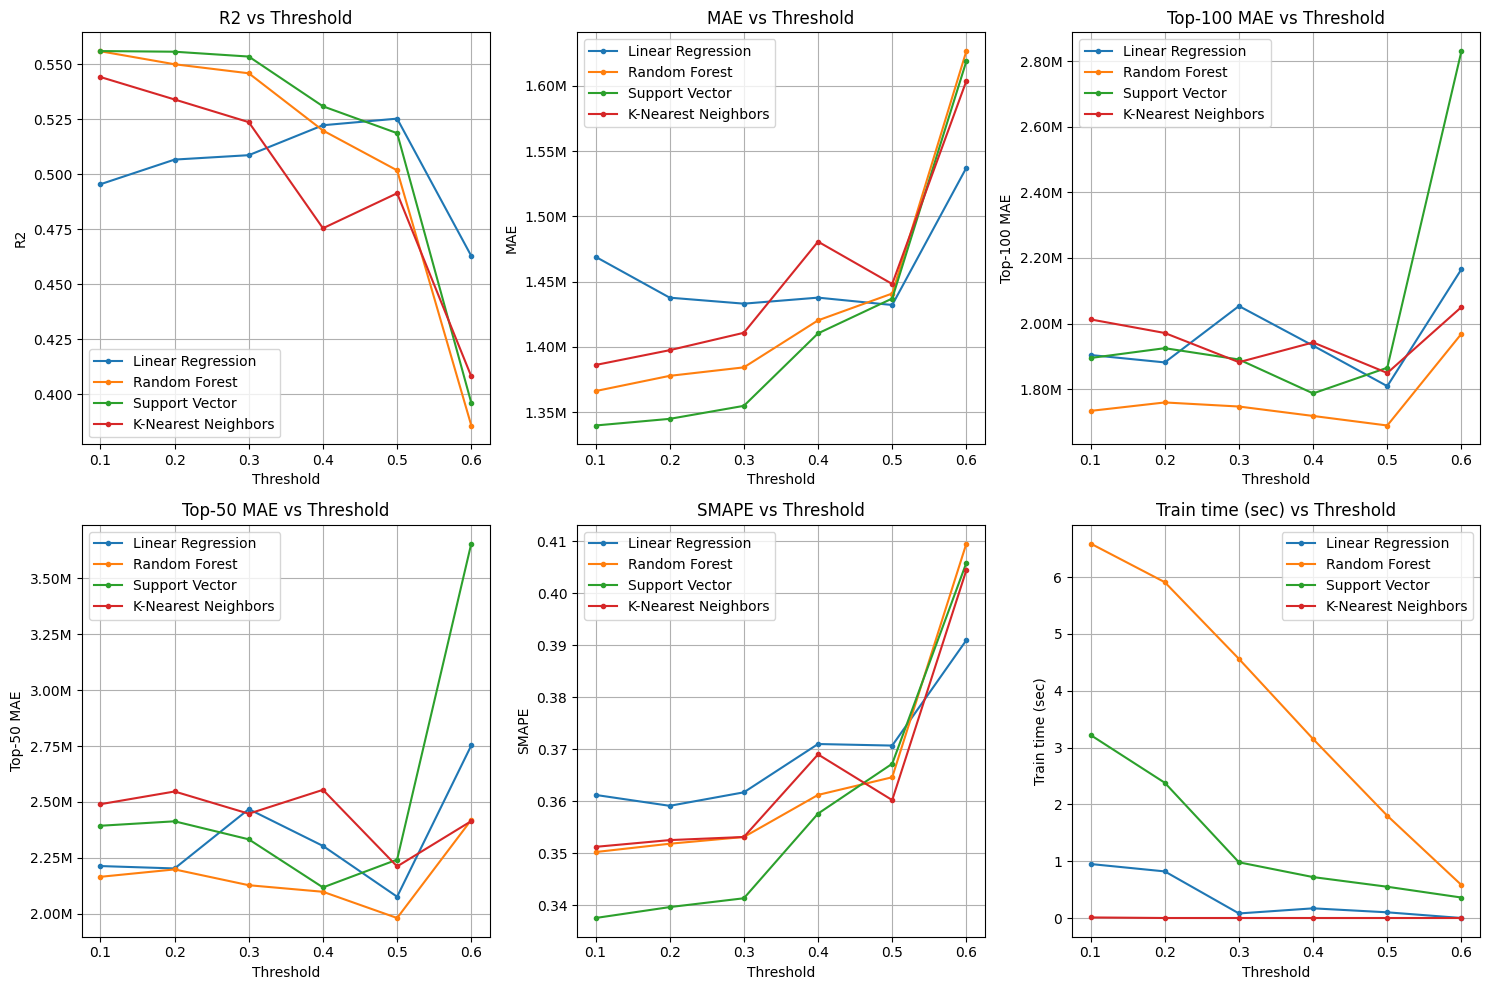

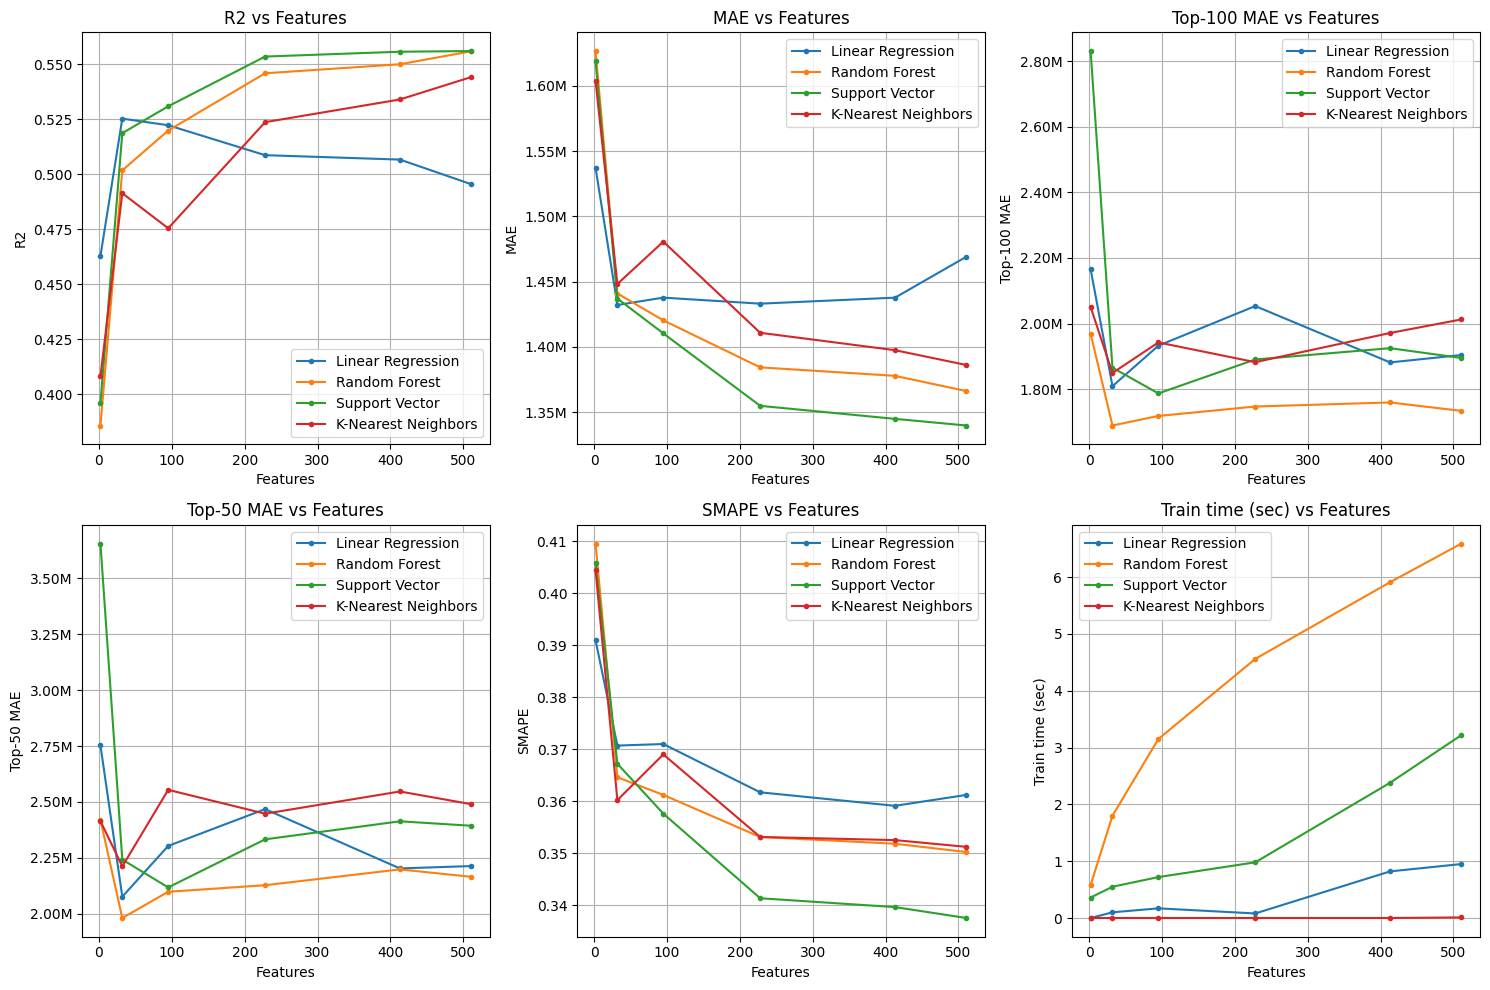

In [9]:
common.plot_metrics(results_df, "Threshold")
common.plot_metrics(results_df, "Features")

## Random Selection

In [10]:
# Standardize the data
X_train, X_test = common.standard_scaler(X_train, X_test)

In [11]:
n_features = [10, 20, 50, 100, 200, 300, 400, 500, X_data.shape[1]-1]

results = []

for n in n_features:
    # Randomly select n features
    rng = np.random.default_rng(seed=12345)
    selected_features = rng.choice(X_train.shape[1], size=n, replace=False)
    X_train_reduced = X_train[:, selected_features]
    X_test_reduced = X_test[:, selected_features]

    # Train and evaluate the model
    results_df, predictions = common.train_and_evaluate(X_train_reduced, y_train, X_test_reduced, y_test)

    results_df["Features"] = n

    results.append(results_df)

results_df = pd.concat(results)
results_df.groupby(by="Features")[results_df.columns].apply(lambda x: x).drop(columns=["Features"])

R2        MAE Top-100 MAE Top-50 MAE  \
Features Model                                                           
10       Linear Regression    0.4822  1,516,986   2,211,265  2,649,530   
         Random Forest        0.4796  1,509,157   2,100,143  2,737,145   
         Support Vector       0.4836  1,503,715   2,273,302  2,892,071   
         K-Nearest Neighbors  0.4345  1,562,287   2,267,887  2,937,656   
20       Linear Regression    0.5254  1,385,284   2,159,127  2,736,993   
         Random Forest        0.5186  1,422,653   2,253,787  2,874,604   
         Support Vector       0.5194  1,402,562   2,394,130  3,063,242   
         K-Nearest Neighbors  0.4865  1,459,765   2,404,914  3,008,550   
50       Linear Regression    0.5321  1,408,249   1,832,230  2,171,290   
         Random Forest        0.5423  1,393,628   1,825,231  2,278,476   
         Support Vector       0.5352  1,416,004   1,900,335  2,364,856   
         K-Nearest Neighbors  0.5149  1,441,322   2,041,872  2,568,063   
100      Linear Regression    0.5864  1,300,907   1,701,469  2,120,465   
         Random Forest        0.5743  1,333,489   1,727,869  2,250,647   
         Support Vector       0.5918  1,287,790   1,822,080  2,300,212   
         K-Nearest Neighbors  0.5078  1,440,904   2,096,645  2,671,528   
200      Linear Regression    0.5795  1,305,477   1,761,106  2,190,760   
         Random Forest        0.5789  1,338,019   1,783,135  2,197,795   
         Support Vector       0.5931  1,280,671   1,894,051  2,394,359   
         K-Nearest Neighbors  0.5338  1,383,844   2,043,542  2,525,929   
300      Linear Regression    0.5340  1,394,833   2,026,289  2,378,097   
         Random Forest        0.5734  1,343,508   1,712,939  2,134,928   
         Support Vector       0.5774  1,293,067   1,802,472  2,323,035   
         K-Nearest Neighbors  0.5291  1,413,438   2,039,094  2,562,262   
400      Linear Regression    0.5140  1,404,114   1,967,911  2,267,881   
         Random Forest        0.5633  1,363,045   1,763,038  2,249,719   
         Support Vector       0.5698  1,303,399   1,807,374  2,333,151   
         K-Nearest Neighbors  0.5587  1,366,267   1,943,712  2,500,617   
500      Linear Regression    0.4938  1,437,090   2,038,397  2,337,069   
         Random Forest        0.5750  1,330,938   1,710,139  2,179,325   
         Support Vector       0.5635  1,315,526   1,904,263  2,450,611   
         K-Nearest Neighbors  0.5598  1,363,691   1,970,665  2,525,004   
764      Linear Regression    0.4994  1,447,414   1,954,974  2,271,386   
         Random Forest        0.5750  1,331,716   1,732,098  2,137,533   
         Support Vector       0.5815  1,293,600   1,905,611  2,429,886   
         K-Nearest Neighbors  0.5540  1,356,219   2,018,904  2,580,622   

                               SMAPE  Train time (sec)  
Features Model                                          
10       Linear Regression    0.3884              0.02  
         Random Forest        0.3803              0.90  
         Support Vector       0.3875              0.42  
         K-Nearest Neighbors  0.3919              0.02  
20       Linear Regression    0.3552              0.02  
         Random Forest        0.3638              1.13  
         Support Vector       0.3549              0.41  
         K-Nearest Neighbors  0.3693              0.00  
50       Linear Regression    0.3640              0.20  
         Random Forest        0.3572              2.21  
         Support Vector       0.3615              0.55  
         K-Nearest Neighbors  0.3668              0.00  
100      Linear Regression    0.3307              0.07  
         Random Forest        0.3406              2.70  
         Support Vector       0.3227              0.69  
         K-Nearest Neighbors  0.3611              0.00  
200      Linear Regression    0.3279              0.14  
         Random Forest        0.3436              3.75  
         Support Vector       0.3208              1.12  
         K-Nearest Neigh

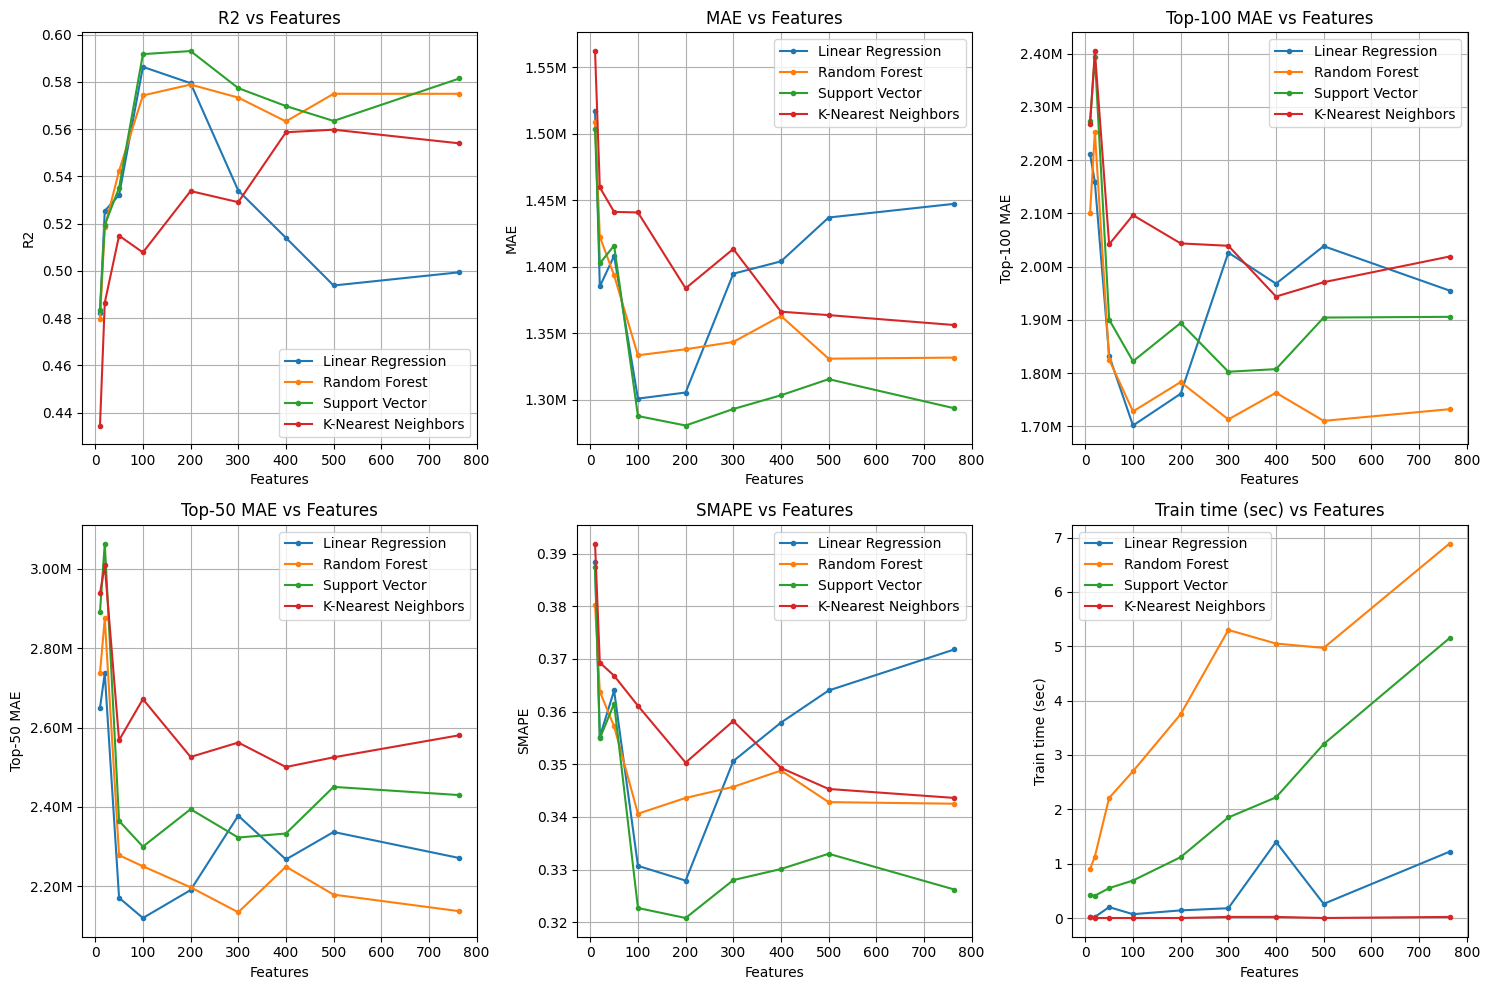

In [12]:
common.plot_metrics(results_df, "Features")

## Curated Features

In [13]:
ten_features = [
    "age",
    "games_played",
    "icetime",
    "gameScore",
    "position_D",
    "I_F_xGoals",
    "I_F_shotAttempts",
    "I_F_points",
    "I_F_goals",
    "OnIce_A_xGoals"
]

twenty_features = ten_features + [
    "OnIce_A_xGoals",
    "I_F_primaryAssists",
    "I_F_hits",
    "OnIce_F_shotAttempts",
    "I_F_shotsOnGoal",
    "I_F_xOnGoal",
    "OnIce_F_highDangerShots",
    "I_F_xGoals_5on5",
    "I_F_points_5on5",
    "I_F_goals_5on5"
]

thirty_features = twenty_features + [
    "shifts",
    "OnIce_F_xGoals_5on5",
    "onIce_xGoalsPercentage",
    "OnIce_F_xGoals",
    "OnIce_A_xGoals",
    "onIce_corsiPercentage",
    "onIce_fenwickPercentage",
    "I_F_xRebounds",
    "I_F_xPlayContinuedInZone",
    "I_F_rebounds"
]

forthy_features = thirty_features + [
    "OnIce_A_highDangerShots",
    "OnIce_A_mediumDangerShots",
    "penalties_5on5",
    "I_F_dZoneGiveaways_5on5",
    "I_F_xGoals_5on4",
    "OnIce_F_goals_5on4",
    "faceoffsWon",
    "OnIce_F_rebounds_5on5",
    "OnIce_F_highDangerShots_5on5",
    "OnIce_F_mediumDangerShots_5on5"
]

In [14]:
results = []

for features in [ten_features, twenty_features, thirty_features, forthy_features]:
    selected_features = [X_columns.get_loc(feature) for feature in features]
    X_train_reduced = X_train[:, selected_features]
    X_test_reduced = X_test[:, selected_features]

    # Train and evaluate the models
    results_df, predictions = common.train_and_evaluate(X_train_reduced, y_train, X_test_reduced, y_test)

    results_df["Features"] = len(features)

    results.append(results_df)

results_df = pd.concat(results)
results_df.groupby(by="Features")[results_df.columns].apply(lambda x: x).drop(columns=["Features"])

R2        MAE Top-100 MAE Top-50 MAE  \
Features Model                                                           
10       Linear Regression    0.5972  1,304,619   1,787,843  2,170,968   
         Random Forest        0.5480  1,396,831   1,835,874  2,268,770   
         Support Vector       0.5421  1,431,640   2,061,207  2,600,320   
         K-Nearest Neighbors  0.5208  1,420,575   2,038,903  2,636,208   
20       Linear Regression    0.5923  1,306,572   1,790,465  2,139,256   
         Random Forest        0.5517  1,402,172   1,758,680  2,235,437   
         Support Vector       0.5654  1,382,579   1,808,086  2,252,780   
         K-Nearest Neighbors  0.5101  1,455,013   2,010,293  2,527,197   
30       Linear Regression    0.5867  1,317,756   1,885,756  2,305,836   
         Random Forest        0.5524  1,409,961   1,789,828  2,244,629   
         Support Vector       0.5673  1,363,986   1,802,121  2,261,938   
         K-Nearest Neighbors  0.5244  1,416,097   1,895,139  2,441,433   
40       Linear Regression    0.5846  1,326,821   1,856,544  2,262,506   
         Random Forest        0.5581  1,374,543   1,800,319  2,252,110   
         Support Vector       0.5750  1,334,249   1,855,225  2,299,091   
         K-Nearest Neighbors  0.5262  1,410,998   2,030,788  2,573,531   

                               SMAPE  Train time (sec)  
Features Model                                          
10       Linear Regression    0.3332              0.02  
         Random Forest        0.3555              1.00  
         Support Vector       0.3649              0.35  
         K-Nearest Neighbors  0.3571              0.02  
20       Linear Regression    0.3311              0.00  
         Random Forest        0.3589              1.51  
         Support Vector       0.3510              0.47  
         K-Nearest Neighbors  0.3611              0.00  
30       Linear Regression    0.3354              0.05  
         Random Forest        0.3603              1.64  
         Support Vector       0.3434              0.61  
         K-Nearest Neighbors  0.3515              0.00  
40       Linear Regression    0.3380              0.06  
         Random Forest        0.3527              1.83  
         Support Vector       0.3359              0.55  
         K-Nearest Neighbors  0.3523              0.00

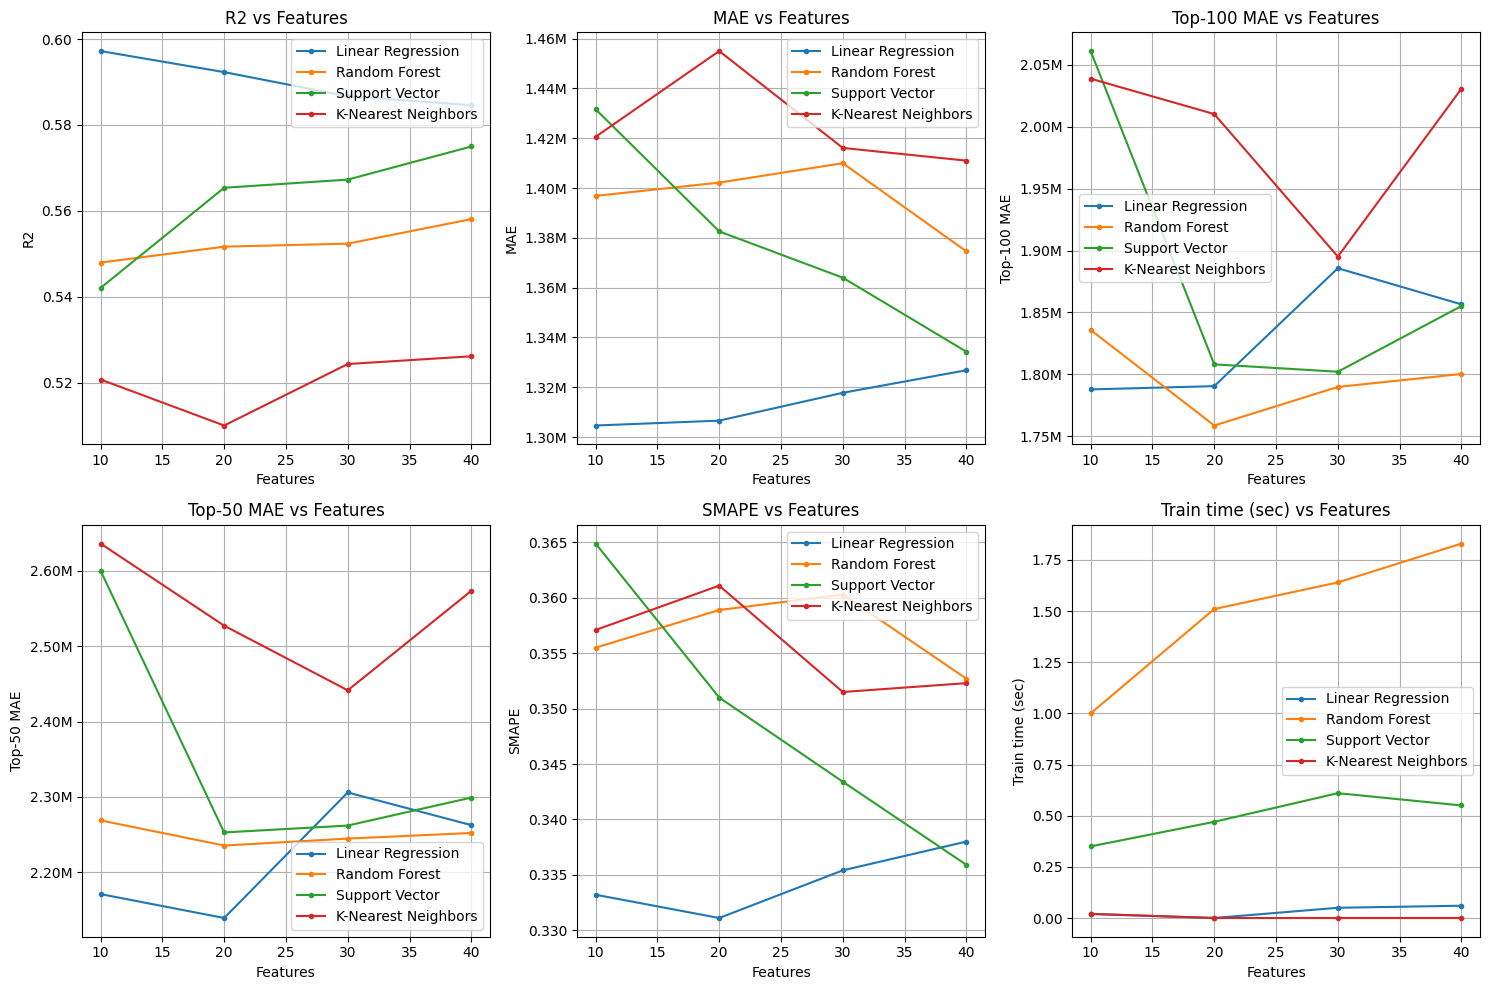

In [15]:
common.plot_metrics(results_df, "Features")